**нелинейная регрессия, метод градиентного спуска**

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [2]:
# загружаем даные
data = np.loadtxt('data/1000b/points.txt')

print( data.shape )
print( data.min(axis=0), data.max(axis=0) )

(1000, 2)
[0. 0.] [111.784913  93.429631]


In [3]:
n_ex = data.shape[0] # количество примеров

In [4]:
X = data[:,0:-1] # признаки
y = data[:,-1] # ответ

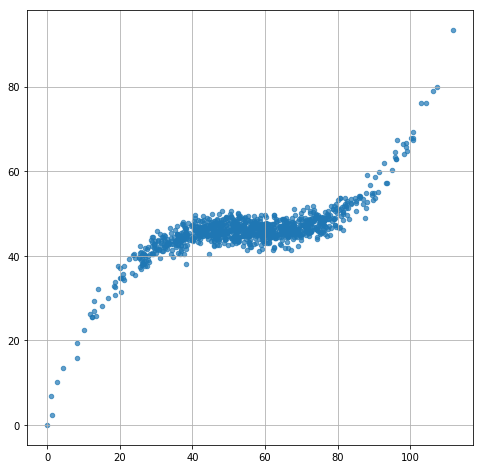

In [5]:
# рисуем исходные данные
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.grid()
plt.show()

In [6]:
# масщтабруем признаки в [-1,1]
X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

In [7]:
# собираем полином

n=3 # степень полинома

poly = PolynomialFeatures(n)
Xp = poly.fit_transform(X)
Xp.shape

(1000, 4)

In [8]:
# инициализация параметров

n_param = Xp.shape[1]

# T = np.random.rand(n_param)
T = np.array( [0] + [1]*(n_param-1) )
T.shape

(4,)

In [9]:
%%time

# метод градиентного спуска

a=0.9 # скорость обучени

ex_count = Xp.shape[0]   # количество примеров


MAX_ITER = 1000 # максимальное число циклов обучения
MIN_ERROR = 3.3 # порог минимальной ошибки
# MIN_ERROR = 0.7 # порог минимальной ошибки

ex_count_div = (1.0/ex_count)
er_hist=[] 

for i in range(MAX_ITER):
    O = Xp.dot(T) # выход
    E = O - y # ошибка
    er = ex_count_div*E.dot(E.T) # средняя квадратичная ошибка
    er_hist.append(er)
    if er < MIN_ERROR: # проверяем достижение порога
        print('step %i/%i: error bound %.03f'%(i,MAX_ITER,er))
        break
    
    E = np.tile(E, ( n+1,1) ).T # дублируем столбцы по количеству параметров
    dT = a*ex_count_div*( (Xp*E).sum(axis=0) ) # изменение весов
    T = T - dT # корректируем параметры

step 465/1000: error bound 3.300
CPU times: user 47.1 ms, sys: 62 µs, total: 47.2 ms
Wall time: 47 ms


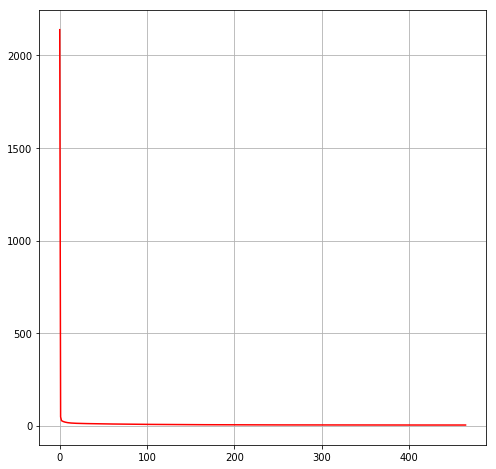

In [10]:
# рисуем изменение ф-ции потери
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.plot(range(len(er_hist)),er_hist,'-r')
plt.grid()
plt.show()

In [11]:
print(T)
print(er)

[46.07939342  0.52936152  0.47954783 41.83131357]
3.299695571421569


In [12]:
# вектор-столбец крайние значения признака

m=100
xx = np.linspace(X.min(),X.max(),m).reshape((m,1))
xxp = poly.transform(xx) # строим полином

# значение регрессии для xxp
yy = xxp.dot(T)


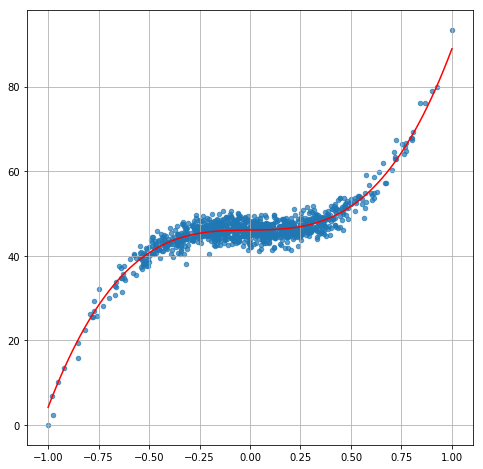

In [13]:
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.plot(xx,yy,'-r') # линия регрессии
plt.grid()
plt.show()